In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [3]:
df.drop(['day','month','year'], axis=1, inplace=True)

In [4]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'), 0,1)

In [6]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [7]:
x=df.drop('FWI', axis=1)
y=df['FWI']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)   

<Axes: >

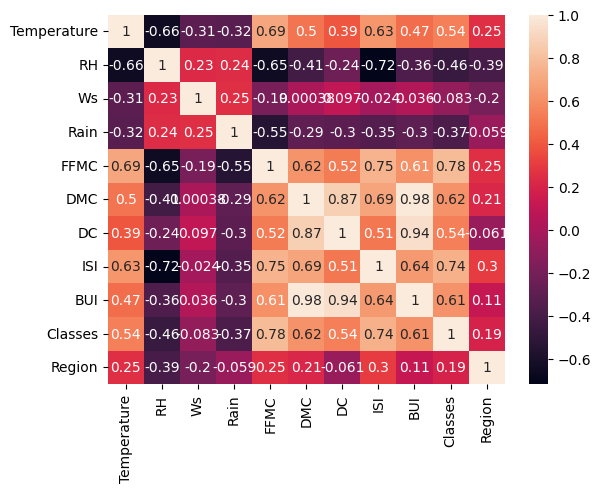

In [9]:
import seaborn as sns
sns.heatmap(x_train.corr(), annot=True)  

In [11]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(x_train, 0.85)
corr_features


{'BUI', 'DC'}

In [13]:
x_train.drop(corr_features, axis=1, inplace=True)
x_test.drop(corr_features, axis=1, inplace=True)
x_train.shape, x_test.shape

((182, 9), (61, 9))

standerdscaler


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

BOX PLOT FOR UNDERSTANING EFFECT OF STANDERD SCALER

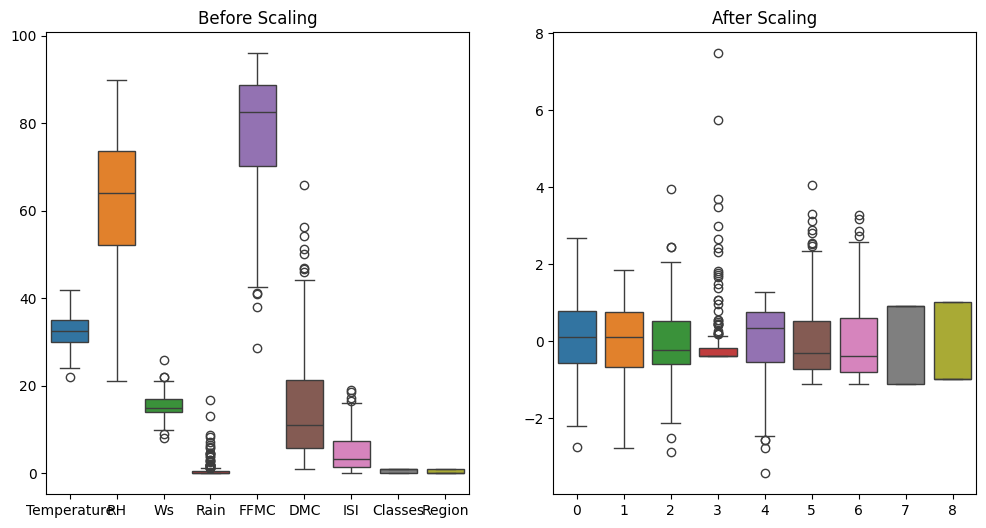

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)  
sns.boxplot(data=x_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('After Scaling')
plt.show()

Mean Squared Error: 0.6742766873791582
R2 Score: 0.9847657384266951


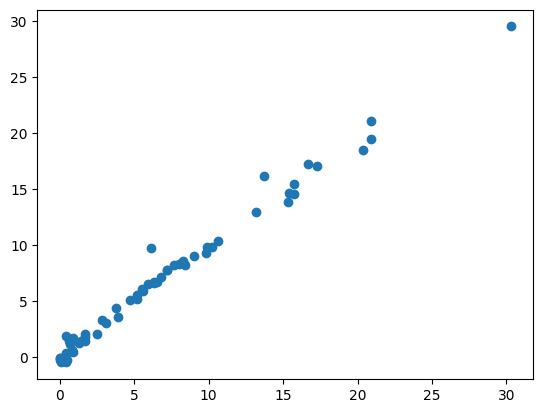

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred=lr.predict(x_test_scaled)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)
plt.scatter(y_test, y_pred) 

Mean Squared Error: 0.6949198918152073
R2 Score: 0.9842993364555513


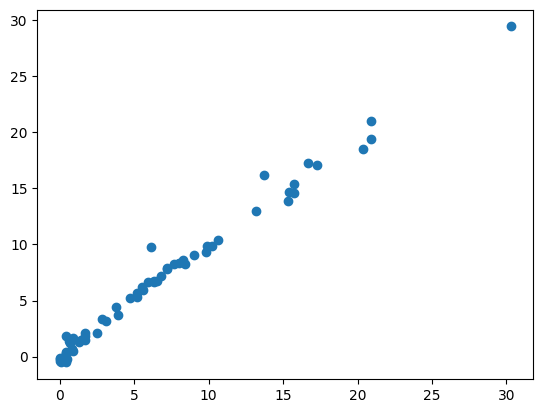

In [17]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred=ridge.predict(x_test_scaled)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)
plt.scatter(y_test, y_pred)
plt.show()


Mean Squared Error: 2.248345891897477
R2 Score: 0.9492020263112388


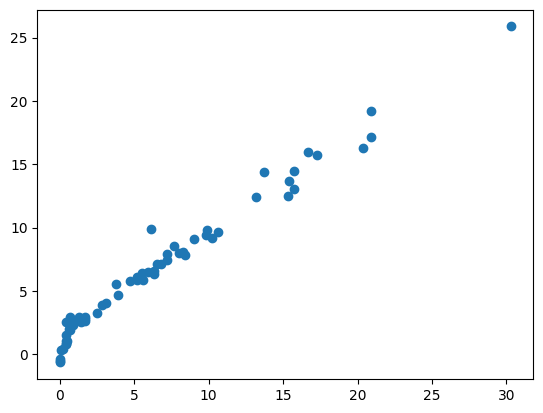

In [18]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train_scaled, y_train)
y_pred=lasso.predict(x_test_scaled)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)
plt.scatter(y_test, y_pred)
plt.show()


Cross validation lasso

In [19]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled, y_train)

LassoCV(cv=5)

Mean Squared Error: 0.7924995554743625
R2 Score: 0.9820946715928275


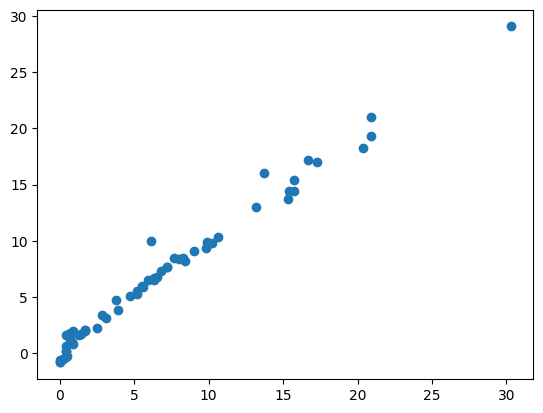

In [20]:
y_pred=lassocv.predict(x_test_scaled)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)
plt.scatter(y_test, y_pred)
plt.show()

Ridge Regeration Model

Mean Squared Error: 0.6949198918152073
R2 Score: 0.9842993364555513


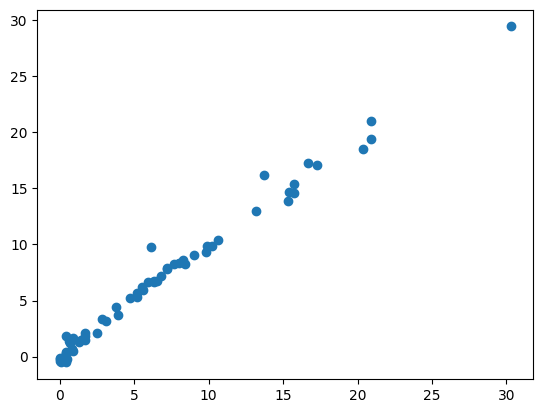

In [21]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred=ridge.predict(x_test_scaled)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)
plt.scatter(y_test, y_pred)
plt.show()


Mean Squared Error: 0.6949198918152073
R2 Score: 0.9842993364555513


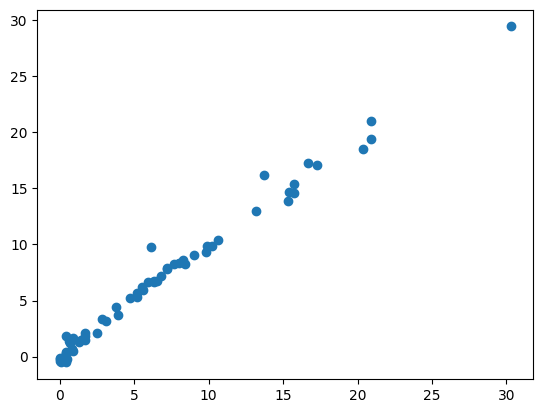

In [22]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled, y_train)
y_pred=ridgecv.predict(x_test_scaled)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)
plt.scatter(y_test, y_pred)
plt.show()

In [22]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

In [23]:
import pickle
pickle.dump(ridge, open('ridge.pkl', 'wb'))   
pickle.dump(scaler, open('scaler.pkl', 'wb'))   
